## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
from bs_ds.imports import *

In [10]:
df = pd.read_csv('russian_troll_tweets_eng_only_date_pub_index.csv', encoding='utf-8',index_col=0)

df['troll_tweet'] = 1
# Recast date_published as datetime and make index
df['date_published'] = pd.to_datetime(df['publish_date'])
df.set_index('date_published', inplace=True)
print('Changed index to datetime "date_published".')

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Changed index to datetime "date_published".


In [11]:
# # Drop un-needed columns
# cols_to_drop = ['publish_date','language']
# for col in cols_to_drop:

#     df.drop(col, axis=1, inplace=True)
#     print(f'Dropped {col}.')


# # Recast categorical columns
# cols_to_cats = ['region','post_type','account_type','account_category']
# for col in cols_to_cats:

#     df[col] = df[col].astype('category')
#     print(f'Converted {col} to category.')


# # Drop problematic nan in 'contet'
# df.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

df.head()

,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,troll_tweet
date_published,,,,,,,,,,,,,,
2017-10-01 19:58:00,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll,1
2017-10-01 22:43:00,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,1
2017-10-01 23:52:00,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,1
2017-10-01 02:47:00,9.060000e+17,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,10/1/2017 2:47,1050,9644,247,NaN,Right,0,RightTroll,1
2017-10-01 02:52:00,9.060000e+17,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,10/1/2017 2:52,1050,9644,249,NaN,Right,0,RightTroll,1


## Retreiving Only Tweets with the Top 40 @'s

In [4]:
# Define get_tags_ats to accept a list of text entries and return all found tags and ats as 2 series/lists
def get_tags_ats(text_to_search,exp_tag = r'(#\w*)',exp_at = r'(@\w*)', output='series',show_counts=False):
    """Accepts a list of text entries to search, and a regex for tags, and a regex for @'s.
    Joins all entries in the list of text and then re.findsall() for both expressions.
    Returns a series of found_tags and a series of found_ats.'"""
    import re
    
    # Create a single long joined-list of strings
    text_to_search_combined = ' '.join(text_to_search)
        
    # print(len(text_to_search_combined), len(text_to_search_list))
    found_tags = re.findall(exp_tag, text_to_search_combined)
    found_ats = re.findall(exp_at, text_to_search_combined)
    
    if output.lower() == 'series':
        found_tags = pd.Series(found_tags, name='tags')
        found_ats = pd.Series(found_ats, name='ats')
        
        if show_counts==True:
            print(f'\t{found_tags.name}:\n{tweet_tags.value_counts()} \n\n\t{found_ats.name}:\n{tweet_ats.value_counts()}')
                
    if (output.lower() != 'series') & (show_counts==True):
        raise Exception('output must be set to "series" in order to show_counts')
                       
    return found_tags, found_ats

In [5]:
# Need to get a list of hash tags.
text_to_search_list = []

for i in range(len(df)):    
    tweet_contents =df['content'].iloc[i]
    text_to_search_list.append(tweet_contents)

text_to_search_list[:2]

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ']

In [6]:
# Get all tweet tags and @'s from text_to_search_list
tweet_tags, tweet_ats = get_tags_ats(text_to_search_list, show_counts=False)

print(f"There were {len(tweet_tags)} unique hashtags and {len(tweet_ats)} unique @'s\n")

# Create a dataframe with top_tags
df_top_tags = pd.DataFrame(tweet_tags.value_counts()[:40])#,'\n')
df_top_tags['% Total'] = (df_top_tags['tags']/len(tweet_tags)*100)

# Create a dataframe with top_ats
df_top_ats = pd.DataFrame(tweet_ats.value_counts()[:40])
df_top_ats['% Total'] = (df_top_ats['ats']/len(tweet_ats)*100)

# Display top tags and ats
# bs.display_side_by_side(df_top_tags,df_top_ats)

There were 832208 unique hashtags and 673442 unique @'s



In [7]:
df_top_ats

,ats,% Total
@midnight,6691,0.993553
@realDonaldTrump,3532,0.524470
@WarfareWW,1529,0.227043
@CNN,1471,0.218430
@HillaryClinton,1424,0.211451
@POTUS,1035,0.153688
@CNNPolitics,948,0.140769
@FoxNews,930,0.138097
@mashable,740,0.109883
@YouTube,680,0.100974


In [9]:
df_ats = pd.DataFrame()
for at in df_top_ats.index:
    df_ats = pd.concat([df_ats, df[df['content'].str.contains(at)]], axis=0)
#     df_ats = df.loc[at in df['content']==True]

In [10]:
df_ats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210271 entries, 2017-03-24 10:12:00 to 2016-09-07 13:50:00
Data columns (total 13 columns):
Unnamed: 0            210271 non-null int64
external_author_id    210271 non-null float64
author                210271 non-null object
content               210271 non-null object
region                210208 non-null category
following             210271 non-null int64
followers             210271 non-null int64
updates               210271 non-null int64
post_type             0 non-null category
account_type          210134 non-null category
retweet               210271 non-null int64
account_category      210271 non-null category
troll_tweet           210271 non-null bool
dtypes: bool(1), category(4), float64(1), int64(5), object(2)
memory usage: 15.4+ MB


In [11]:
df_ats.drop('Unnamed: 0', axis=1,inplace=True)

___

In [5]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

## Loading in the new control tweets

In [32]:
# df_new.language.value_counts()

In [33]:
df_new = pd.read_csv('newly_extracted_control_tweets.csv',encoding='utf-8', index_col=0)
df_new['troll_tweet'] = 0
df_new = df_new.loc[df_new['language']=='en']

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39086 entries, 0 to 44126
Data columns (total 14 columns):
external_author_id    39086 non-null float64
author                39086 non-null object
content               39086 non-null object
region                24921 non-null object
following             0 non-null float64
followers             39086 non-null float64
updates               0 non-null float64
post_type             39086 non-null object
account_type          39086 non-null object
retweet               39086 non-null bool
account_category      39086 non-null object
publish_date          39086 non-null object
language              39086 non-null object
troll_tweet           39086 non-null int64
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 4.2+ MB


In [35]:
# Recast date_published as datetime and make index
df_new['date_published'] = pd.to_datetime(df_new['publish_date'])
df_new.set_index('date_published', inplace=True)
print('Changed index to datetime "date_published".')

Changed index to datetime "date_published".


In [36]:
# # Drop un-needed columns
# cols_to_drop = ['publish_date','language']
# for col in cols_to_drop:

#     df_new.drop(col, axis=1, inplace=True)
#     print(f'Dropped {col}.')


# # Recast categorical columns
# cols_to_cats = ['region','post_type','account_type','account_category']
# for col in cols_to_cats:

#     df_new[col] = df_new[col].astype('category')
#     print(f'Converted {col} to category.')


# Drop problematic nan in 'contet'
# df_new.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

df_new.head()

,external_author_id,author,content,region,following,followers,updates,post_type,account_type,retweet,account_category,publish_date,language,troll_tweet
date_published,,,,,,,,,,,,,,
2019-06-02 18:34:59,1.114658e+18,Draftdodgingdon,@realDonaldTrump it’s perfectly reasonable tha...,NaN,NaN,0.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,1.038424e+18,beapartofthemo1,RT @BelkissObadia: BREAKING NEWS: \n\n@realDon...,"Bradenton, FL",NaN,1198.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,8.798349e+17,BarbHuber9,@realDonaldTrump I thought you were supposed t...,NaN,NaN,1099.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,4.765020e+09,nonamehombre,RT @realDonaldTrump: Mexico is sending a big d...,NaN,NaN,69.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,8.244085e+17,letbuildthewall,RT @realDonaldTrump: Mexico is sending a big d...,NaN,NaN,18.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0


In [37]:
df.columns, df_new.columns

(Index(['external_author_id', 'author', 'content', 'region', 'language',
        'publish_date', 'following', 'followers', 'updates', 'post_type',
        'account_type', 'retweet', 'account_category', 'troll_tweet'],
       dtype='object'),
 Index(['external_author_id', 'author', 'content', 'region', 'following',
        'followers', 'updates', 'post_type', 'account_type', 'retweet',
        'account_category', 'publish_date', 'language', 'troll_tweet'],
       dtype='object'))

In [38]:
df_full = pd.concat([df,df_new],axis=0)
df_full.info()

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1311934 entries, 2017-10-01 19:58:00 to 2019-06-03 00:09:23
Data columns (total 14 columns):
account_category      1311934 non-null object
account_type          1311588 non-null object
author                1311934 non-null object
content               1311933 non-null object
external_author_id    1311934 non-null float64
followers             1311934 non-null float64
following             1272848 non-null float64
language              1311934 non-null object
post_type             39086 non-null object
publish_date          1311934 non-null object
region                1296624 non-null object
retweet               1311934 non-null int64
troll_tweet           1311934 non-null int64
updates               1272848 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 150.1+ MB


## Save full csv

In [39]:
# df_full.to_csv('combined_troll_and_control_tweets_en.csv',encoding='utf-8')

In [71]:
# from pandas_profiling import ProfileReport
# ProfileReport(df_full)

## Language Pre-Processing

In [218]:
np.random.seed(42)
test_length= 100
real_length=len(df_new) # to match new tweets

df_small =pd.DataFrame()
df_small = df_full.loc[df_full['troll_tweet']==1].sample(test_length)

df_small= pd.concat([df_small, df_full.loc[df_full['troll_tweet']==0].sample(n=test_length)], axis=0)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2017-01-28 05:57:00 to 2019-06-02 18:24:32
Data columns (total 14 columns):
account_category      200 non-null object
account_type          200 non-null object
author                200 non-null object
content               200 non-null object
external_author_id    200 non-null float64
followers             200 non-null float64
following             100 non-null float64
language              200 non-null object
post_type             100 non-null object
publish_date          200 non-null object
region                152 non-null object
retweet               200 non-null int64
troll_tweet           200 non-null int64
updates               100 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 23.4+ KB


### Creating 2 df: one for trolls and one for controls

In [219]:
df_sm_troll = df_small.loc[df_small['troll_tweet']==1]
df_sm_contr = df_small.loc[df_small['troll_tweet']==0]

In [220]:
# ProfileReport(df_small)

### Generating Frequency Distribtuions

In [273]:
from nltk.corpus import stopwords
import string
from nltk import word_tokenize

In [274]:
# Combine text for trolls and controls
text_troll_raw = ' '.join(df_sm_troll['content'])
text_contr_raw =' '.join(df_sm_contr['content'])

In [356]:
# Remove urls with regex
import re
url = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

text_troll = url.sub(' ',text_troll_raw)
text_contr = url.sub(' ',text_contr_raw)

In [276]:
# Remove Hashtags
hashtag = re.compile(r'\#\w*')
troll_tags = hashtag.findall(text_troll)
text_troll = hashtag.sub(' ',text_troll)

control_tags = hashtag.findall(text_contr)
text_contr = hashtag.sub(' ',text_contr)

In [285]:
# Remove mentions @'s
mentions = re.compile(r'\@\w*')
troll_mentions = mentions.findall(text_troll)
text_troll = mentions.sub(' ',text_troll)

control_mentions = mentions.findall(text_contr)
text_contr = mentions.sub(' ',text_contr)

In [286]:
# Tokenize cleaned text
token_troll = word_tokenize(text_troll)
token_contr = word_tokenize(text_contr)

In [389]:
# Generate Stopwords List
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','``','co','realdonaldtrump','“','’','‘','”','rt',"n't","''"]

In [390]:
# Filter Out Stopwords
text_troll_stopped = [x.lower() for x in token_troll if x.lower() not in stopwords_list]
text_contr_stopped = [x.lower() for x in token_contr if x.lower() not in stopwords_list]

# Tokenize stopped words
text_troll_tokens = word_tokenize(' '.join(text_troll_stopped))
text_contr_tokens = word_tokenize(' '.join(text_contr_stopped))

In [391]:
from nltk import FreqDist
freq_trolls = FreqDist(text_troll_stopped)
freq_controls = FreqDist(text_contr_stopped)

print(freq_trolls.most_common(20))
print(freq_controls.most_common(20))

[("'s", 13), ('trump', 11), ('state', 4), ('people', 4), ('workout', 4), ('body', 3), ('weight', 3), ('us', 3), ('life', 3), ('work', 3), ('president', 3), ('police', 3), ('make', 3), ('county', 3), ('new', 3), ('help', 3), ('thanks', 3), ('show', 2), ('could', 2), ('court', 2)]
[("'s", 9), ('trump', 9), ('big', 7), ('like', 7), ('border', 7), ('25', 7), ('years', 7), ('past', 6), ('mexico', 6), ('would', 5), ('keep', 5), ('back', 5), ('peggy', 5), ('noonan', 5), ('writer', 5), ('reagan', 5), ('idea', 5), ('sending', 5), ('delegation', 5), ('talk', 5)]


### Generate Word Clouds

In [331]:
def compare_word_cloud(text1,label1,text2,label2):
    from wordcloud import WordCloud
    wordcloud1 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text1))
    wordcloud2 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text2))


    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,15))
    ax[0].imshow(wordcloud1, interpolation='bilinear')
    ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=20)

    ax[1].imshow(wordcloud2, interpolation='bilinear')
    ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=20)

    fig.tight_layout()
    return fig,ax

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE686FFEF0>,
       dtype=object))

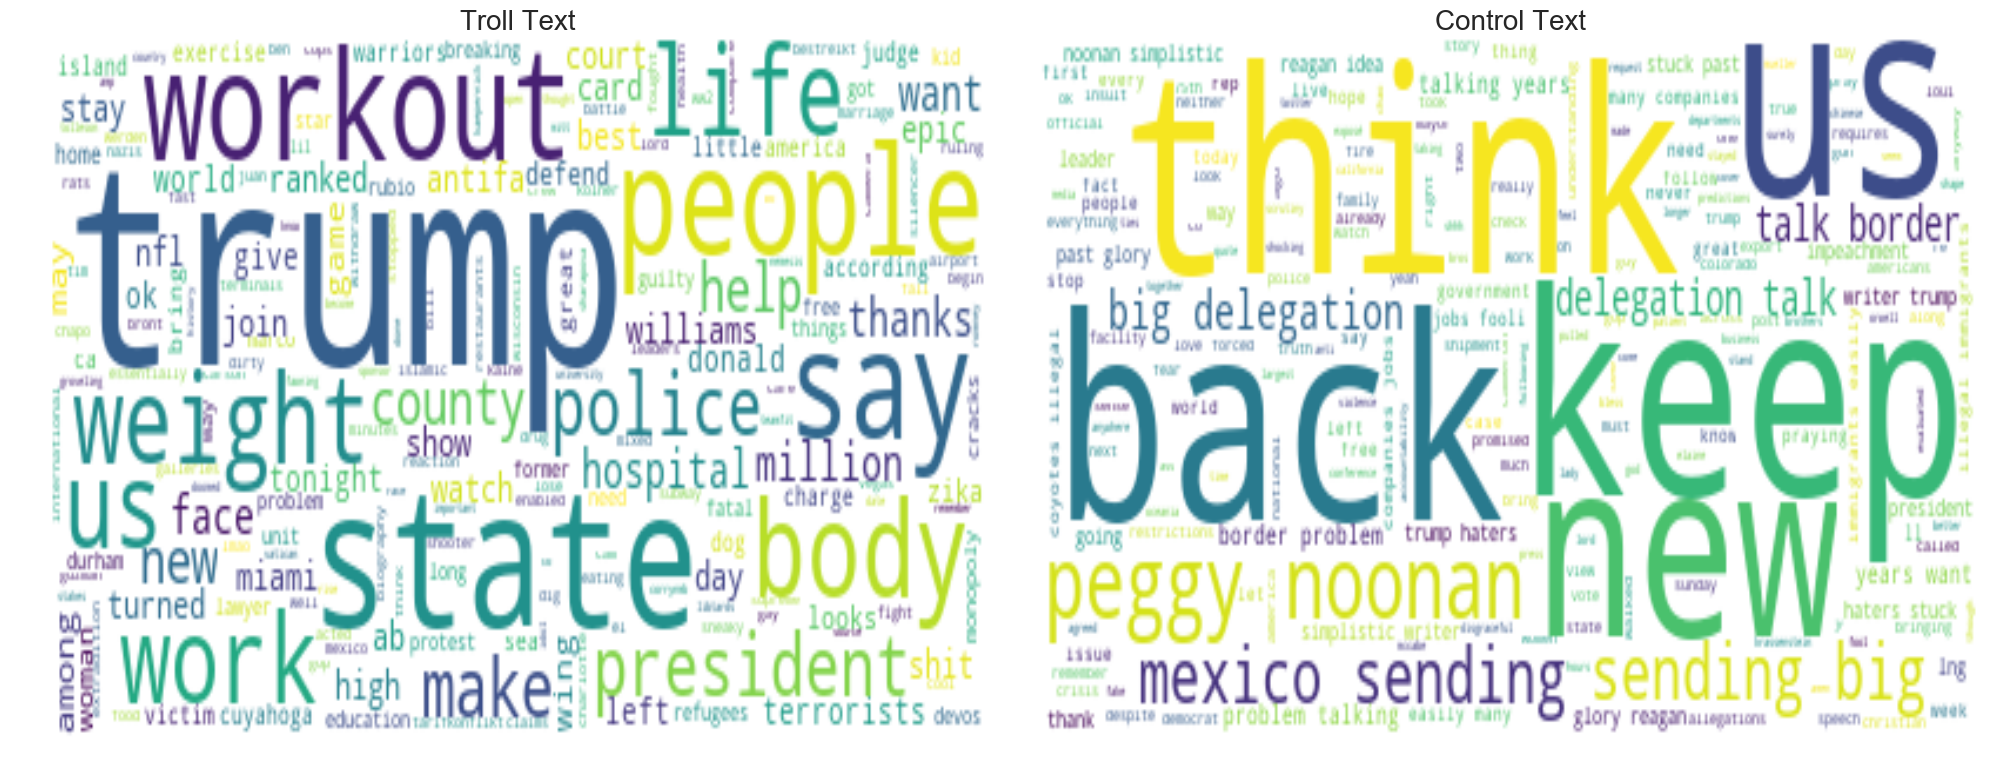

In [333]:
compare_word_cloud(text_troll_tokens,'Troll Text',text_contr_tokens,'Control Text')

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE686E4668>,
       dtype=object))

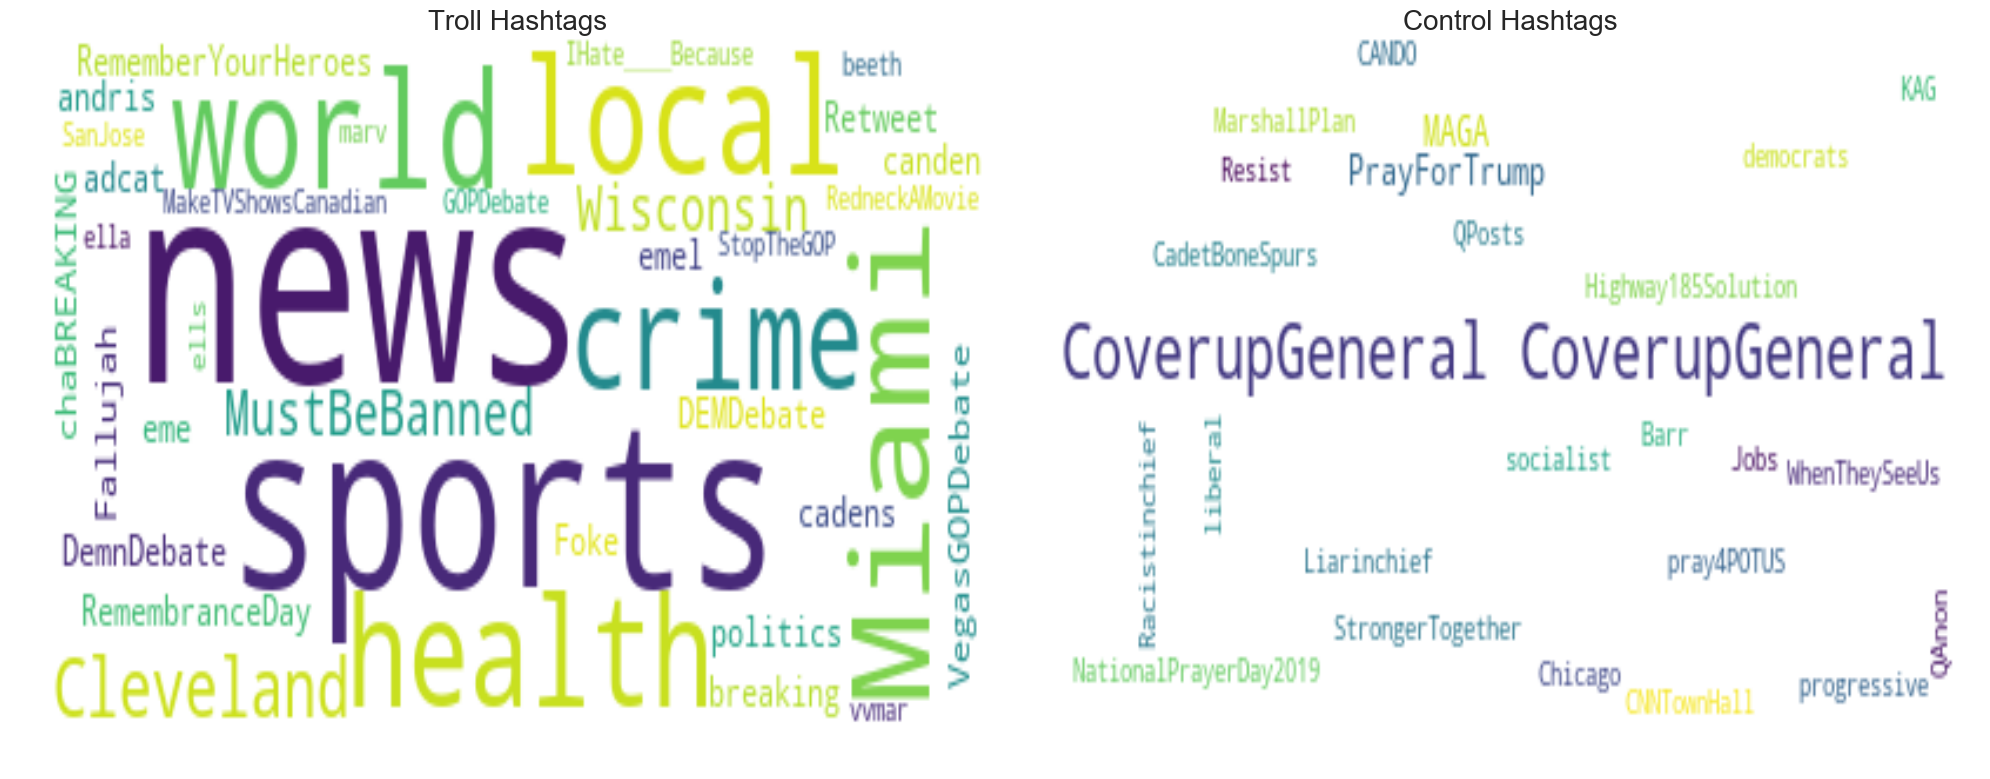

In [335]:
compare_word_cloud(troll_tags,'Troll Hashtags',control_tags,'Control Hashtags')

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDD30EC198>,
       dtype=object))

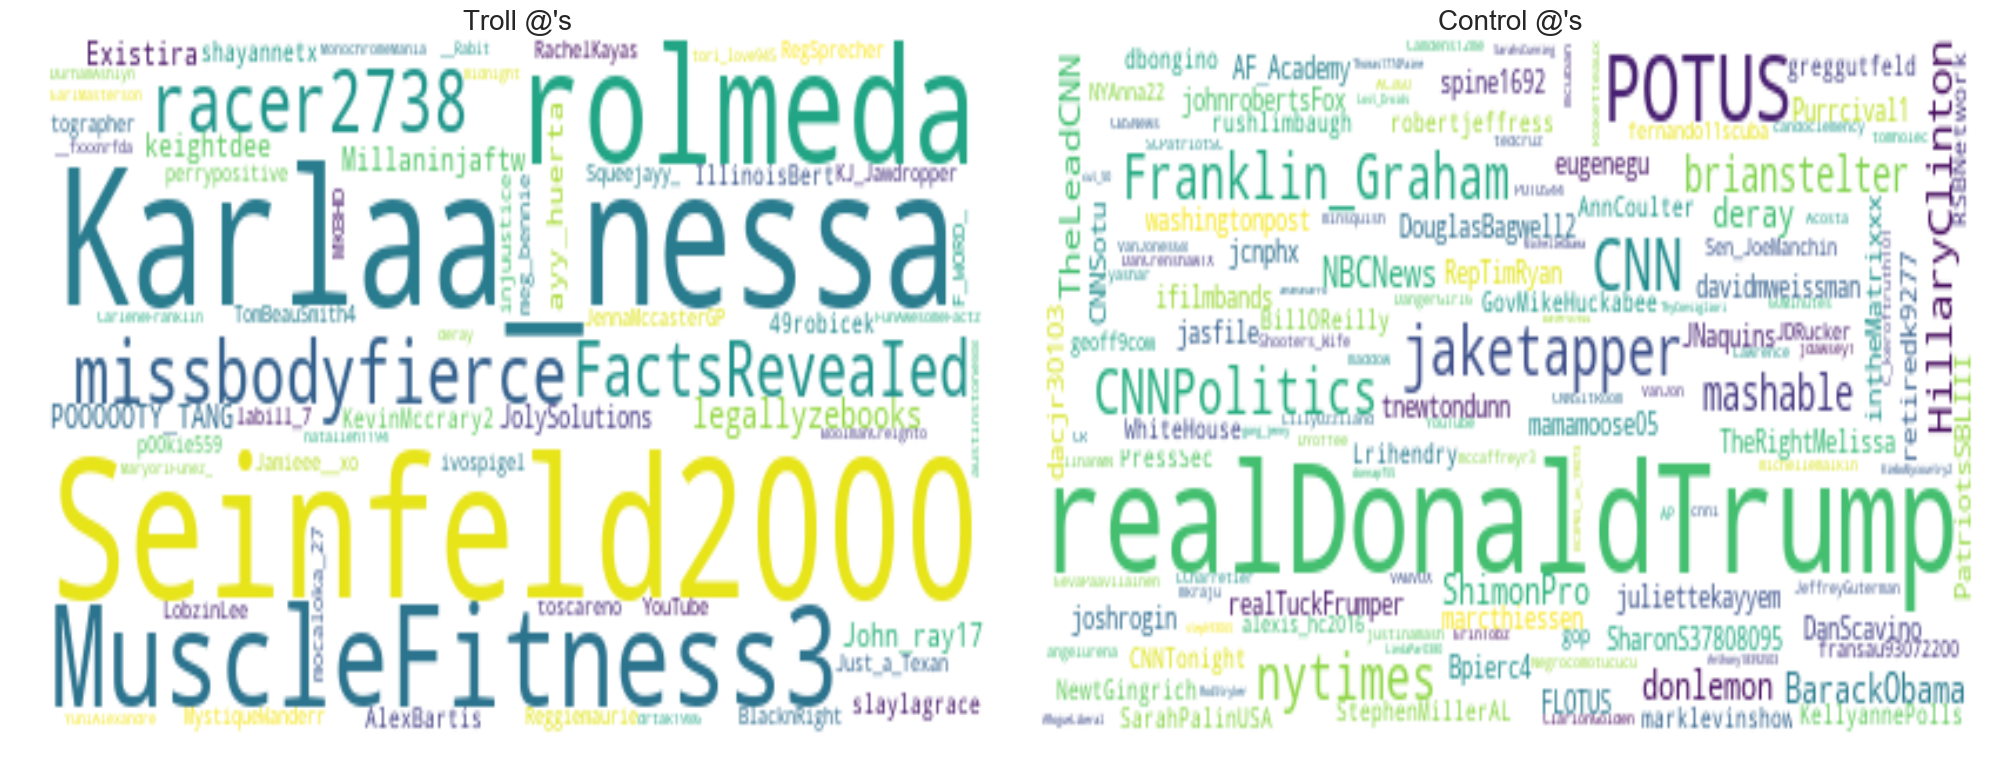

In [336]:
compare_word_cloud(troll_mentions,"Troll @'s",control_mentions,"Control @'s")

### Generating Word Embeddings

- [ ] Need to use apply to apply the hashtag, url, and mentions regex's to the whole dataframe 

In [384]:
# Combining all regular expressions operations for convenience
import re
url = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
hashtag = re.compile(r'(\#\w*)')
mentions = re.compile(r'(\@\w*)')

df_troll_clean = df_sm_troll.copy()
df_contr_clean = df_sm_contr.copy()

df_troll_clean['content'].apply(lambda x: url.sub(' ',x))
df_contr_clean['content'].apply(lambda x: url.sub(' ',x))

df_troll_clean['content'].apply(lambda x: hashtag.sub(' ',x))
df_contr_clean['content'].apply(lambda x: hashtag.sub(' ',x))

df_troll_clean['content'].apply(lambda x: mentions.sub(' ',x))
df_contr_clean['content'].apply(lambda x: mentions.sub(' ',x))

date_published
2019-06-03 01:57:10    RT  : BIG NEWS! As I promised two weeks ago, t...
2019-06-03 01:18:36    RT  : We evaluated the 100 largest police depa...
2019-06-02 18:19:30          Yeah you pulled that out of your ass. Shhh.
2019-06-02 18:21:45    RT  :   The fake media did not cover the fact ...
2019-06-03 01:43:50      Great quote.   As the predictions of Orwell ...
2019-06-03 02:03:41    RT  : This   exposé on Elaine Chao and her fam...
2019-06-01 22:24:40                The more I think about it, the mor...
2019-06-02 17:22:12            Agreed Lord! Amen! 🙏❤\nGod Bless you, ...
2019-06-02 18:19:56      The Krassenstein brothers are no longer on T...
2019-06-02 18:33:12        You’ve just made yourself an official fool...
2019-06-02 18:27:19    RT  : President   stayed after his commencemen...
2019-06-03 02:04:12    RT  : On this week’s State of the Cartoonion: ...
2019-06-02 16:28:09            I pray your potUS gets explosive diarrhea
2019-06-02 18:21:01    RT  : The Wal

In [376]:
np.random.choice(df_sm_troll['content']),np.random.choice(df_sm_contr['content'])

('Watch as Antifa HUNTS DOWN a Trump Supporter to Beat Him Unconscious https://t.co/gDjZskveiU #beeth https://t.co/oTyMFu89S8',
 'RT @realDonaldTrump: ....Coyotes and Illegal Immigrants, which they can do very easily, or our many companies and jobs that have been fooli…')

In [377]:
from nltk import word_tokenize
from gensim.models import Word2Vec
data_tr = df_troll_clean['content'].map(word_tokenize)
data_co = df_contr_clean['content'].map(word_tokenize)

In [378]:
model_tr = Word2Vec(data_tr, size=100, window=5, min_count=1, workers=4)
model_co = Word2Vec(data_co, size=100, window=5, min_count=1, workers=4)

In [379]:
model_tr.train(data_tr, total_examples=model.corpus_count, epochs=10)
model_co.train(data_co, total_examples=model.corpus_count, epochs=10)

(19311, 27210)

In [380]:
wvtr = model_tr.wv
wvco = model_co.wv

In [381]:
wvtr.most_similar('Trump')

[(',', 0.7090815901756287),
 (':', 0.7076240181922913),
 ('’', 0.7022097110748291),
 ('https', 0.6979113817214966),
 ('@', 0.695167064666748),
 ('to', 0.6941143274307251),
 ('#', 0.6822593808174133),
 ("n't", 0.6629782915115356),
 ('at', 0.662548840045929),
 ('for', 0.6461422443389893)]

In [45]:
## Original way to make X a list of all strings  
# X = [str(i) for i  in df_small['content']]
# y = list(df_small['troll_tweet'])
# print('X:',type(X), len(X))
# print('y:',type(y),len(y))

### Using Feature Engineerging for Text Data lesson

In [ ]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

In [ ]:
import string
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','“','’','”','...','``']

In [ ]:
#print(stopwords_list)

In [ ]:
from nltk import word_tokenize
X_strings = ' '.join(X)
tokens = word_tokenize(X_strings)

In [ ]:
'“' in stopwords_list

In [ ]:
stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]

In [ ]:
from nltk import FreqDist
freqdist = FreqDist(stopped_tokens)
freqdist.most_common(50)

### Attempting to Use Spacy to create 2 differnt doc objects

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [60]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')

In [61]:
X_text = ' '.join(X_train)
doc = nlp(X_text)

In [ ]:
doc.

In [65]:
# displacy.render(doc, style='dep',jupyter=True, options={'distance':110})

In [51]:
# docTroll = nlp(df_small['content'].loc[df_small['troll_tweet']==True])

In [75]:
# X_train_vect.shape
for i in range(len(X_train)):
    curr = X_train[i]
    
    if type(curr)=='str':
        print(i,X_train[i])

In [ ]:
df_small['content'][4]